Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import string

In [2]:
#Récupération des données
df=pd.read_csv("movies2024.csv")
df.head(10)

,MovieID,Title,Popularity,Overview,Genres,Actors,Directors,VoteAverage,ReleaseYear
0,933131,Badland Hunters,1382.144,After a deadly earthquake turns Seoul into a l...,"Science Fiction, Action, Drama","Ma Dong-seok, Lee Hee-jun, Lee Jun-young, Roh ...",Heo Myeong-haeng,6.742,2024.0
1,1211483,Skal - Fight for Survival,1000.333,"My name's Arthur, a huge Internet star who's j...","Action, Horror, Comedy, Thriller","Evan Marsh, Chris Sandiford, Mariah Inger, Dar...",Benjamin Cappelletti,5.690,2023.0
2,1029575,The Family Plan,980.464,"Dan Morgan is many things: a devoted husband, ...","Action, Comedy","Mark Wahlberg, Michelle Monaghan, Maggie Q, Zo...",Simon Cellan Jones,7.300,2023.0
3,1214314,One More Shot,943.197,Following the attack on the black site in Pola...,"Action, Thriller","Scott Adkins, Michael Jai White, Alexis Knapp,...",James Nunn,6.636,2024.0
4,787699,Wonka,1175.854,Willy Wonka – chock-full of ideas and determin...,"Comedy, Family, Fantasy","Timothée Chalamet, Calah Lane, Keegan-Michael ...",Paul King,7.200,2023.0
5,955916,Lift,904.384,"An international heist crew, led by Cyrus Whit...","Action, Comedy, Crime","Kevin Hart, Gugu Mbatha-Raw, Sam Worthington, ...",F. Gary Gray,6.586,2024.0
6,940551,Migration,860.071,After a migrating duck family alights on their...,"Animation, Action, Adventure, Comedy, Family","Kumail Nanjiani, Elizabeth Banks, Caspar Jenni...",Benjamin Renner,7.622,2023.0
7,1022796,Wish,799.179,"Asha, a sharp-witted idealist, makes a wish so...","Animation, Family, Fantasy, Adventure","Ariana DeBose, Chris Pine, Alan Tudyk, Angeliq...","Chris Buck, Fawn Veerasunthorn",6.638,2023.0
8,609681,The Marvels,1053.458,"Carol Danvers, aka Captain Marvel, has reclaim...","Science Fiction, Adventure, Action","Brie Larson, Teyonah Parris, Iman Vellani, Zaw...",Nia DaCosta,6.300,2023.0
9,1212073,Sixty Minutes,1037.758,"Desperate to keep custody of his daughter, a m...","Action, Drama","Emilio Sakraya, Dennis Mojen, Marie Mouroum, F...",Oliver Kienle,6.864,2024.0


Visualisation des données

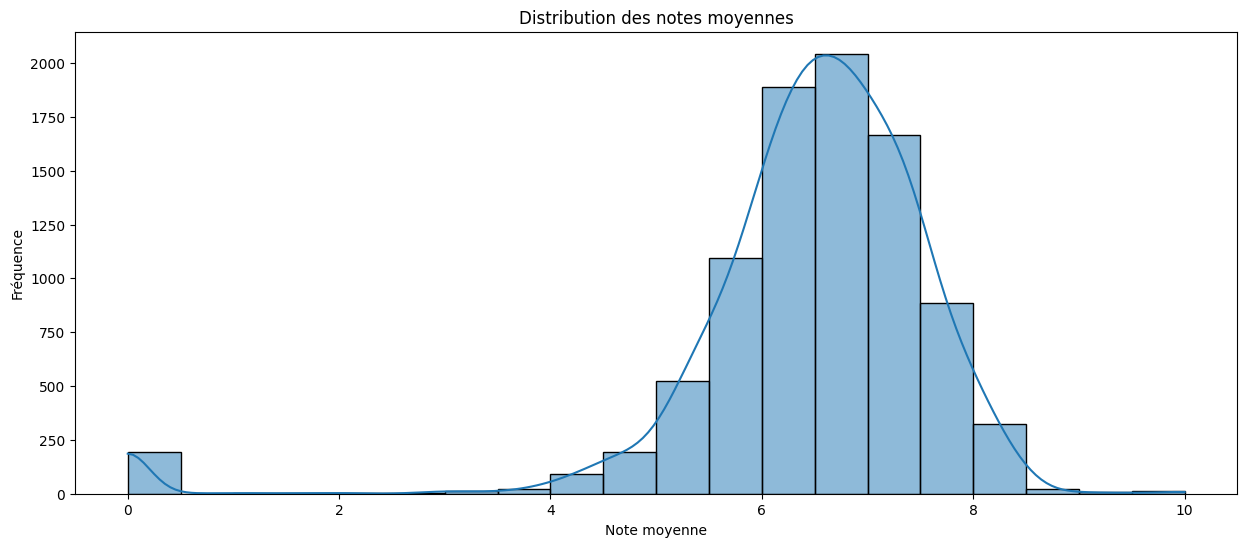

In [3]:
# Histogramme des notes moyennes
plt.figure(figsize=(15, 6))
sns.histplot(df['VoteAverage'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Fréquence')
plt.show()

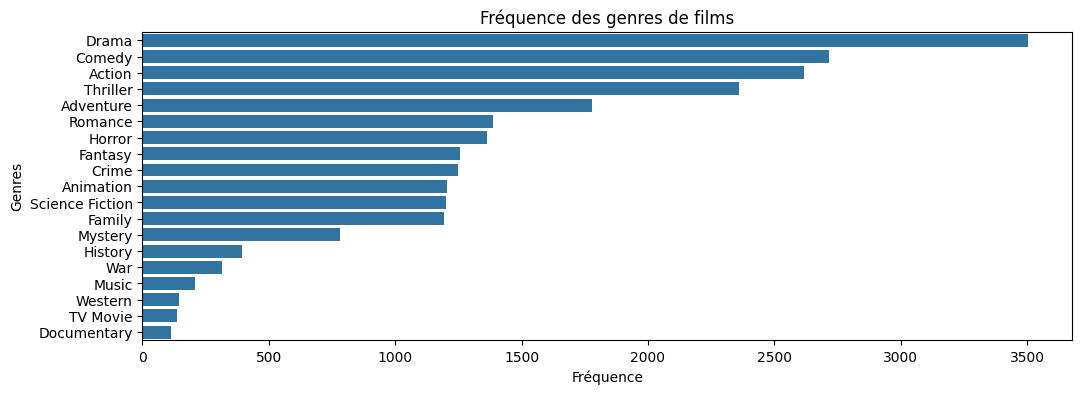

In [4]:
# Diagramme à barres pour les genres de films
plt.figure(figsize=(12, 4))
genre_counts = df['Genres'].str.strip().str.split(',').explode().str.strip().value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Fréquence des genres de films')
plt.xlabel('Fréquence')
plt.ylabel('Genres')
plt.show()

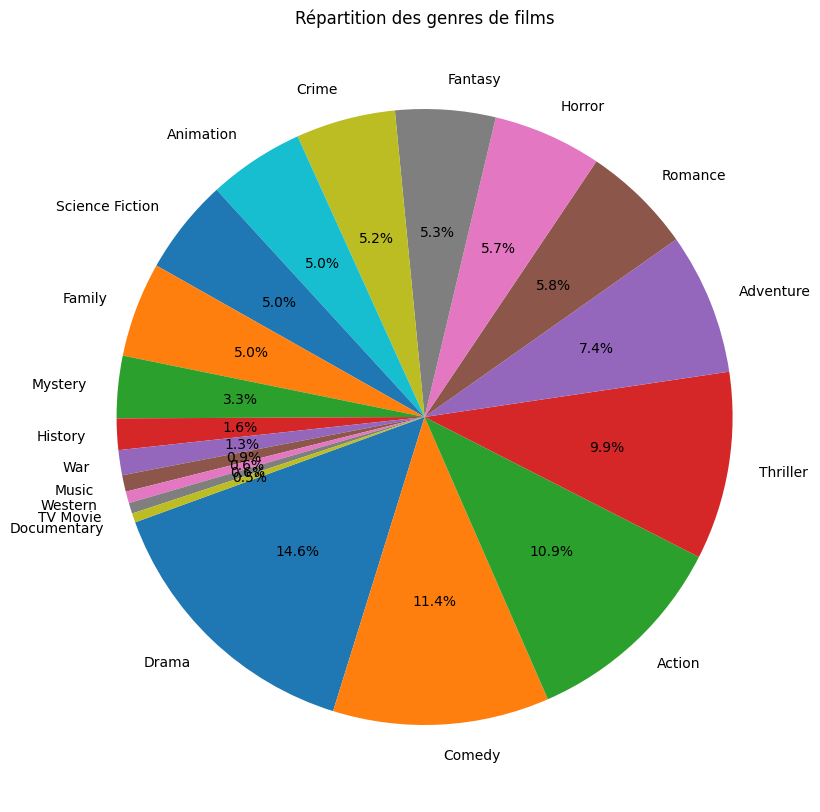

In [5]:
# Afficher le diagramme à secteurs
plt.figure(figsize=(18, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=200)
plt.title('Répartition des genres de films')
plt.show()

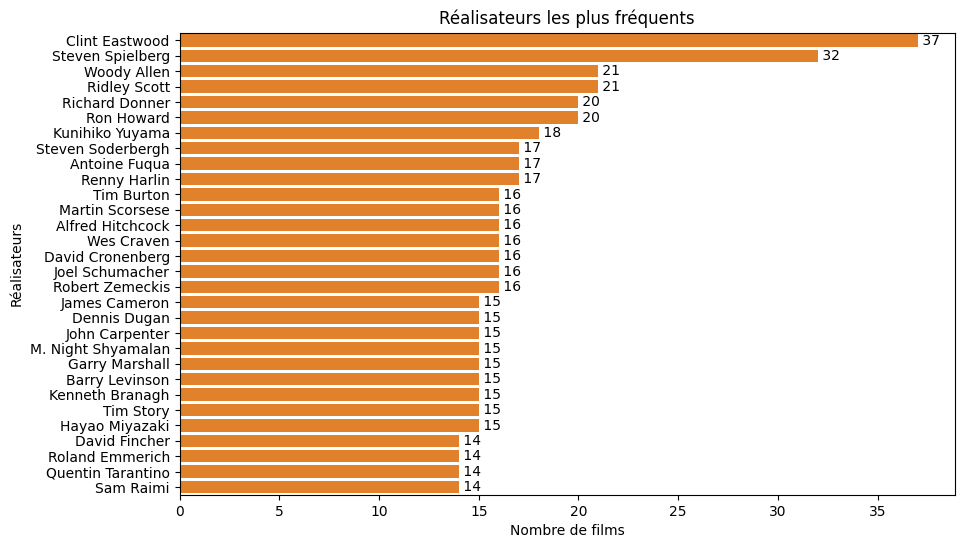

In [6]:
# Afficher le graphique à barres des réalisateurs les plus fréquents et compter leur fréquence
plt.figure(figsize=(10, 6))
director_counts = df['Directors'].str.strip().value_counts().head(30)
sns.barplot(x=director_counts.values, y=director_counts.index)
bar_plot = sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title('Réalisateurs les plus fréquents')
plt.xlabel('Nombre de films')
plt.ylabel('Réalisateurs')
# Afficher les valeurs exactes à côté des barres
for index, value in enumerate(director_counts.values):
    bar_plot.text(value, index, f' {value}', ha='left', va='center')
plt.show()

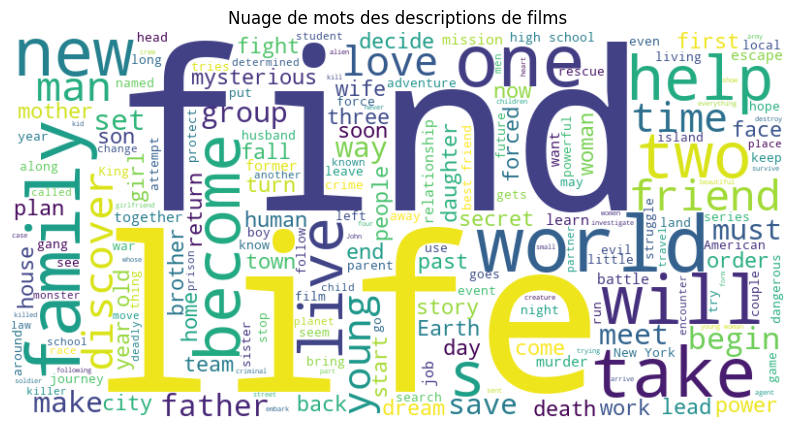

In [7]:
# Concaténer toutes les descriptions de films
text = ' '.join(df['Overview'].fillna(''))
# Créer et afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des descriptions de films')
plt.show()

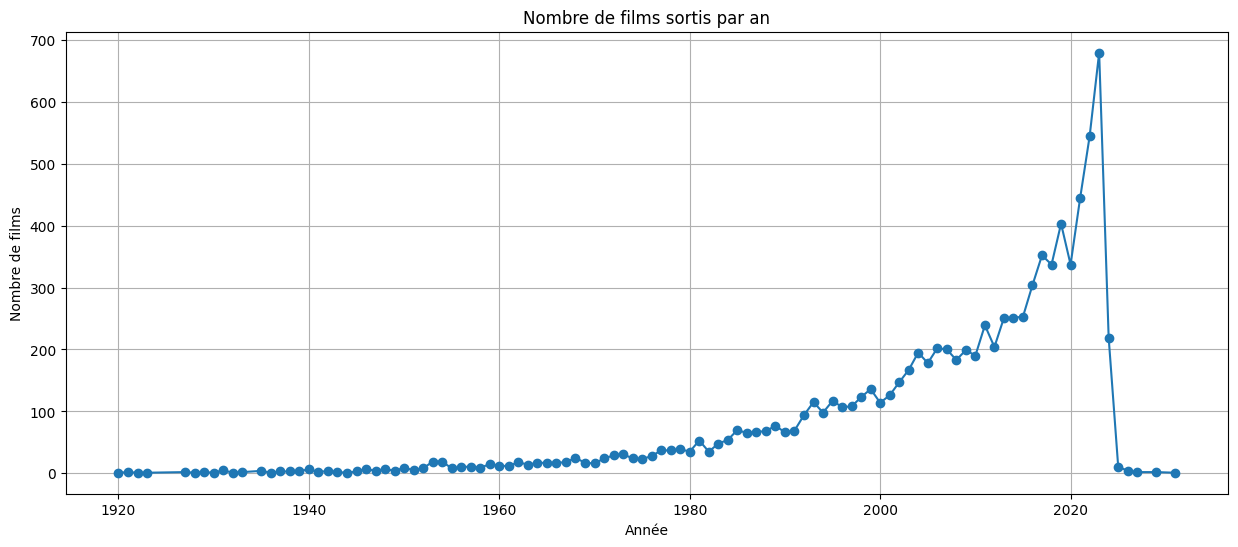

In [8]:
# Convertir la colonne ReleaseYear en datetime et compter les sorties par année
df['ReleaseYear'] = pd.to_datetime(df['ReleaseYear'], format='%Y')
yearly_counts = df['ReleaseYear'].dt.year.value_counts().sort_index()
# Afficher le graphique temporel
plt.figure(figsize=(15, 6))
yearly_counts.plot(marker='o')
plt.title('Nombre de films sortis par an')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.grid(True)
plt.show()

Préprocessing

In [9]:
# Compter les valeurs manquantes par colonne
missing_values_count = df.isna().sum()
# Afficher les colonnes avec des valeurs manquantes et leur décompte respectif
print(missing_values_count[missing_values_count > 0])


Overview       30
Genres         17
Actors         68
Directors      48
ReleaseYear    15
dtype: int64


In [10]:
# Identifier les lignes avec des valeurs manquantes
rows_with_missing_values = df[df.isnull().any(axis=1)]
# Afficher les lignes où il y a au moins une valeur manquante
rows_with_missing_values


,MovieID,Title,Popularity,Overview,Genres,Actors,Directors,VoteAverage,ReleaseYear
460,1156593,Your Fault,70.698,NaN,"Drama, Romance","Nicole Wallace, Gabriel Guevara",Domingo González,0.00,NaT
472,574074,Kitbull,67.224,An unlikely connection sparks between two crea...,"Animation, Family, Drama",NaN,Rosana Sullivan,7.97,2019-01-01
648,1156593,Your Fault,70.698,NaN,"Drama, Romance","Nicole Wallace, Gabriel Guevara",Domingo González,0.00,NaT
708,574074,Kitbull,67.224,An unlikely connection sparks between two crea...,"Animation, Family, Drama",NaN,Rosana Sullivan,7.97,2019-01-01
813,676902,Invierno 13,61.571,"After moving into her new home with her son, A...","Action, Thriller",NaN,NaN,5.00,2017-01-01
...,...,...,...,...,...,...,...,...,...
8793,1233391,Wandering Bird,22.911,A body is floating in the water. A strange bir...,Drama,NaN,Victor Dupuis,0.00,2024-01-01
8845,1084242,Zootopia 2,18.021,Sequel to the 2016 animated film Zootopia. Plo...,"Animation, Comedy, Family","Ginnifer Goodwin, Jason Bateman",NaN,0.00,2025-01-01
8872,1233338,In Praise of Slowness,24.476,Due to economic and technological forces resha...,NaN,NaN,Hicham Gardaf,0.00,2024-01-01
8978,1233389,Pacific Vein,22.639,The endless tracking shot through a picturesqu...,Animation,NaN,Ulu Braun,0.00,2024-01-01


In [11]:
# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)
# Réinitialiser les index
df.reset_index(drop=True, inplace=True)
# Compter les valeurs manquantes par colonne
missing_values_count = df.isna().sum()
# Afficher les colonnes avec des valeurs manquantes et leur décompte respectif
print(missing_values_count[missing_values_count > 0])
# Afficher la forme du DataFrame après la suppression et la réinitialisation des index
print(df.shape)

Series([], dtype: int64)
(8872, 9)


In [12]:
# Compter le nombre d'occurrences de chaque titre
movie_counts = df['MovieID'].value_counts()
# Filtrer les titres qui apparaissent plus d'une fois
duplicated_movies = movie_counts[movie_counts > 1]
# Afficher le nombre de titres qui apparaissent plus d'une fois
print(f"Nombre de films apparaissant plus d'une fois : {len(duplicated_movies)}")
duplicated_movies


Nombre de films apparaissant plus d'une fois : 1979


62838     4
2469      4
741074    4
9787      3
13121     3
         ..
540       2
9426      2
42684     2
300671    2
923579    2
Name: MovieID, Length: 1979, dtype: int64

In [13]:
# Supprimer les duplicatas dans la colonne 'MovieID'
df.drop_duplicates(subset='MovieID', keep='first', inplace=True)
# Réinitialiser les index
df.reset_index(drop=True, inplace=True)


In [14]:
# Compter le nombre d'occurrences de chaque titre
movie_counts = df['MovieID'].value_counts()
# Filtrer les titres qui apparaissent plus d'une fois
duplicated_movies = movie_counts[movie_counts > 1]
# Afficher le nombre de titres qui apparaissent plus d'une fois
print(f"Nombre de films apparaissant plus d'une fois : {len(duplicated_movies)}")
duplicated_movies

Nombre de films apparaissant plus d'une fois : 0


Series([], Name: MovieID, dtype: int64)

In [15]:
# Afficher la forme du DataFrame après la suppression des doublons
print(df.shape)

(6743, 9)


In [16]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Colonnes non numériques :", non_numeric_columns)

Colonnes non numériques : ['Title', 'Overview', 'Genres', 'Actors', 'Directors', 'ReleaseYear']


In [17]:
df['ReleaseYear'] = pd.to_numeric(df['ReleaseYear'])
df.head(2)

,MovieID,Title,Popularity,Overview,Genres,Actors,Directors,VoteAverage,ReleaseYear
0,933131,Badland Hunters,1382.144,After a deadly earthquake turns Seoul into a l...,"Science Fiction, Action, Drama","Ma Dong-seok, Lee Hee-jun, Lee Jun-young, Roh ...",Heo Myeong-haeng,6.742,1704067200000000000
1,1211483,Skal - Fight for Survival,1000.333,"My name's Arthur, a huge Internet star who's j...","Action, Horror, Comedy, Thriller","Evan Marsh, Chris Sandiford, Mariah Inger, Dar...",Benjamin Cappelletti,5.690,1672531200000000000


Elaboration des matrices

In [18]:
# Sélectionner uniquement les colonnes pertinentes pour le modèle
selected_columns = ['MovieID', 'Genres', 'Actors', 'Directors', 'VoteAverage', 'ReleaseYear']  # Colonnes sélectionnées
df_selected = df[selected_columns].copy()
df_selected

,MovieID,Genres,Actors,Directors,VoteAverage,ReleaseYear
0,933131,"Science Fiction, Action, Drama","Ma Dong-seok, Lee Hee-jun, Lee Jun-young, Roh ...",Heo Myeong-haeng,6.742,1704067200000000000
1,1211483,"Action, Horror, Comedy, Thriller","Evan Marsh, Chris Sandiford, Mariah Inger, Dar...",Benjamin Cappelletti,5.690,1672531200000000000
2,1029575,"Action, Comedy","Mark Wahlberg, Michelle Monaghan, Maggie Q, Zo...",Simon Cellan Jones,7.300,1672531200000000000
3,1214314,"Action, Thriller","Scott Adkins, Michael Jai White, Alexis Knapp,...",James Nunn,6.636,1704067200000000000
4,787699,"Comedy, Family, Fantasy","Timothée Chalamet, Calah Lane, Keegan-Michael ...",Paul King,7.200,1672531200000000000
...,...,...,...,...,...,...
6738,1156646,Documentary,"Hiam Abbass, Lina Soualem",Lina Soualem,6.000,1704067200000000000
6739,11570,"Adventure, Comedy","Burt Lancaster, Nick Cravat, Eva Bartok, Torin...",Robert Siodmak,6.972,-568080000000000000
6740,10102,"Drama, Comedy","Marcello Mastroianni, Ugo Tognazzi, Michel Pic...",Marco Ferreri,7.200,94694400000000000
6741,25934,Drama,"Sidney Poitier, Christian Roberts, Judy Geeson...",James Clavell,7.493,-94694400000000000


In [19]:
# Convertir les colonnes catégoriques en listes pour le One-Hot Encoding
df_selected['Genres'] = df_selected['Genres'].apply(lambda x: x.split(','))
df_selected['Actors'] = df_selected['Actors'].apply(lambda x: x.split(','))
df_selected['Directors'] = df_selected['Directors'].apply(lambda x: [x])

# Appliquer le One-Hot Encoding pour les Genres, Acteurs et Réalisateurs
mlb_genres = MultiLabelBinarizer()
mlb_actors = MultiLabelBinarizer()
mlb_directors = MultiLabelBinarizer()

encoded_genres = pd.DataFrame(mlb_genres.fit_transform(df_selected['Genres']), columns=mlb_genres.classes_, index=df_selected.index)
encoded_actors = pd.DataFrame(mlb_actors.fit_transform(df_selected['Actors']), columns=mlb_actors.classes_, index=df_selected.index)
encoded_directors = pd.DataFrame(mlb_directors.fit_transform(df_selected['Directors']), columns=mlb_directors.classes_, index=df_selected.index)

# Concaténer les DataFrames encodés avec df_selected
df_final = pd.concat([df_selected.drop(['Genres', 'Actors', 'Directors'], axis=1), encoded_genres, encoded_actors, encoded_directors], axis=1)
df_final


,MovieID,VoteAverage,ReleaseYear,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,"Àlex Pastor, David Pastor",Álvaro Fernández Armero,Ángel Gómez Hernández,Ángel Manuel Soto,"Éric Toledano, Olivier Nakache",Éric-Emmanuel Schmitt,Étienne Comar,Óskar Thór Axelsson,İlker Çatak,Şenol Sönmez
0,933131,6.742,1704067200000000000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1211483,5.690,1672531200000000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1029575,7.300,1672531200000000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1214314,6.636,1704067200000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,787699,7.200,1672531200000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,1156646,6.000,1704067200000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6739,11570,6.972,-568080000000000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6740,10102,7.200,94694400000000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6741,25934,7.493,-94694400000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)
# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=200)  # Réduisez le nombre de composants selon vos besoins
df_reduced = pca.fit_transform(scaled_data)


In [21]:
# Calcul de la similarité cosinus entre les articles réduits
article_similarity = cosine_similarity(df_reduced, df_reduced)
# Affichage des similarités
article_similarity

array([[ 1.00000000e+00,  2.82580612e-01,  2.02094324e-02, ...,
         3.26193698e-01,  1.01612213e-01,  1.96515628e-01],
       [ 2.82580612e-01,  1.00000000e+00,  1.08953296e-01, ...,
         4.55757877e-01,  1.57149887e-01,  2.78118347e-01],
       [ 2.02094324e-02,  1.08953296e-01,  1.00000000e+00, ...,
         8.96771513e-02, -1.59592380e-02,  7.29779361e-04],
       ...,
       [ 3.26193698e-01,  4.55757877e-01,  8.96771513e-02, ...,
         1.00000000e+00,  2.12639703e-01,  3.22824785e-01],
       [ 1.01612213e-01,  1.57149887e-01, -1.59592380e-02, ...,
         2.12639703e-01,  1.00000000e+00,  1.20325333e-01],
       [ 1.96515628e-01,  2.78118347e-01,  7.29779361e-04, ...,
         3.22824785e-01,  1.20325333e-01,  1.00000000e+00]])

In [22]:
# Supposons que nous avons une matrice de similarité entre les films
num_movies = article_similarity.shape[0]
# Générer des prédictions factices pour les scores des utilisateurs
predicted_ratings = np.random.rand(num_movies, num_movies) * 5 # Échelle de notation de 0 à 5, par exemple
# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(article_similarity, predicted_ratings, squared=False)
print(f"RMSE: {rmse}")

RMSE: 2.7595913690931657


In [23]:
def get_recommendations_based_on_genre(genre, article_similarity, num_recommendations=5):
    # Trouver les films similaires en fonction du genre donné
    genre_indices = df[df['Genres'].apply(lambda x: genre in x)]
    recommendations = genre_indices.index.tolist()
    return recommendations[:num_recommendations]

def get_recommendations_based_on_actor(actor, article_similarity, num_recommendations=5):
    # Trouver les films similaires en fonction de l'acteur donné
    actor_indices = df[df['Actors'].apply(lambda x: actor in x)]
    recommendations = actor_indices.index.tolist()
    return recommendations[:num_recommendations]

def get_recommendations_based_on_director(director, article_similarity, num_recommendations=5):
    # Trouver les films similaires en fonction du réalisateur donné
    director_indices = df[df['Directors'].apply(lambda x: director in x)]
    recommendations = director_indices.index.tolist()
    return recommendations[:num_recommendations]

def get_movie_titles(indices):
    return df.iloc[indices]['Title'].tolist()

# Récupérer des recommandations basées sur le genre
genre = 'Adventure'
recommendations_genre = get_recommendations_based_on_genre(genre, article_similarity)
#print(f"Recommandations pour le genre '{genre}': {recommendations_genre}")
titles_genre = get_movie_titles(recommendations_genre)
print(f"Titres recommandés pour le genre '{genre}': {titles_genre}")

# Récupérer des recommandations basées sur l'acteur
actor = 'Daniel Radcliffe'
recommendations_actor = get_recommendations_based_on_actor(actor, article_similarity)
#print(f"Recommandations pour l'acteur '{actor}': {recommendations_actor}")
titles_actor = get_movie_titles(recommendations_actor)
print(f"Titres recommandés pour l'acteur '{actor}': {titles_actor}")
# Récupérer des recommandations basées sur le réalisateur
director = 'Quentin Tarantino'
recommendations_director = get_recommendations_based_on_director(director, article_similarity)
#print(f"Recommandations pour le réalisateur '{director}': {recommendations_director}")
titles_director = get_movie_titles(recommendations_director)
print(f"Titres recommandés pour le réalisateur '{director}': {titles_director}")


Titres recommandés pour le genre 'Adventure': ['Migration', 'Wish', 'The Marvels', 'Aquaman and the Lost Kingdom', 'Expend4bles']
Titres recommandés pour l'acteur 'Daniel Radcliffe': ["Harry Potter and the Philosopher's Stone", 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Deathly Hallows: Part 2', 'Harry Potter and the Order of the Phoenix']
Titres recommandés pour le réalisateur 'Quentin Tarantino': ['Pulp Fiction', 'Django Unchained', 'Once Upon a Time… in Hollywood', 'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2']


In [24]:
# Création d'une nouvelle colonne 'Description' avec la concaténation des colonnes pertinentes
df['Description'] = df['Overview'] + ' ' + df['Actors'] + ' ' + df['Directors'] + ' ' + df['Genres']

# Sélection des colonnes nécessaires pour le nouveau DataFrame
new_df = df[['MovieID', 'Title', 'Description']].copy()
new_df

,MovieID,Title,Description
0,933131,Badland Hunters,After a deadly earthquake turns Seoul into a l...
1,1211483,Skal - Fight for Survival,"My name's Arthur, a huge Internet star who's j..."
2,1029575,The Family Plan,"Dan Morgan is many things: a devoted husband, ..."
3,1214314,One More Shot,Following the attack on the black site in Pola...
4,787699,Wonka,Willy Wonka – chock-full of ideas and determin...
...,...,...,...
6738,1156646,Bye Bye Tiberias,"In her early twenties, Hiam Abbass left her na..."
6739,11570,The Crimson Pirate,Burt Lancaster plays a pirate with a taste for...
6740,10102,La Grande Bouffe,Four friends gather at a villa with the intent...
6741,25934,"To Sir, with Love",A British Guianese engineer starts a job as a ...


In [25]:
# Liste des stopwords en anglais
stop_words = set(stopwords.words('english'))
# Fonction pour prétraiter le texte
def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = text.split()
    # Supprimer les stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Reconstruire le texte traité
    processed_text = ' '.join(tokens)
    return processed_text
# Appliquer le prétraitement aux descriptions
new_df['Processed_Description'] = new_df['Description'].apply(preprocess_text)
# Initialisation de CountVectorizer avec le traitement des données (stopwords, etc.)
vectorizer = CountVectorizer()
# Transformer les descriptions prétraitées en une matrice de compte de mots
description_matrix = vectorizer.fit_transform(new_df['Processed_Description'])
# Calcul de la similarité cosinus entre les descriptions
description_similarity = cosine_similarity(description_matrix, description_matrix)
description_similarity


array([[1.        , 0.03414939, 0.01889822, ..., 0.01460204, 0.01336306,
        0.09792365],
       [0.03414939, 1.        , 0.03388155, ..., 0.01745278, 0.        ,
        0.        ],
       [0.01889822, 0.03388155, 1.        , ..., 0.03863337, 0.04419417,
        0.05551749],
       ...,
       [0.01460204, 0.01745278, 0.03863337, ..., 1.        , 0.08195375,
        0.0285977 ],
       [0.01336306, 0.        , 0.04419417, ..., 0.08195375, 1.        ,
        0.05234239],
       [0.09792365, 0.        , 0.05551749, ..., 0.0285977 , 0.05234239,
        1.        ]])

In [26]:
# Supposons que nous avons une matrice de similarité entre les films
num_movies = description_similarity.shape[0]
# Générer des prédictions factices pour les scores des utilisateurs
predicted_ratings3 = np.random.rand(num_movies, num_movies) * 5 # Échelle de notation de 0 à 5, par exemple
# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(description_similarity, predicted_ratings3, squared=False)
print(f"RMSE: {rmse}")

RMSE: 2.8569960342799687


In [29]:
def get_movie_recommendations_by_title(movie_title, df, description_similarity, num_recommendations=5):
    # Trouver l'index du film dans le DataFrame
    movie_index = df[df['Title'] == movie_title].index[0]
    
    # Obtenir les indices des films similaires pour le film donné
    similar_movies = sorted(list(enumerate(description_similarity[movie_index])), key=lambda x: x[1], reverse=True)
    
    # Récupérer les titres des films recommandés
    recommended_movie_indices = [movie[0] for movie in similar_movies[1:num_recommendations+1]]  # Exclut le film lui-même
    recommended_movies = df.iloc[recommended_movie_indices]['Title'].tolist()
    
    return recommended_movies

# Exemple : obtenir des recommandations pour un titre de film spécifique
movie_title = 'The Family Plan'  # Remplacez par le titre du film pour lequel vous voulez des recommandations
num_recommendations = 10  # Nombre de recommandations à générer
recommendations = get_movie_recommendations_by_title(movie_title, new_df, description_similarity, num_recommendations)

# Afficher les recommandations
print(f"Recommandations pour le film '{movie_title}': {recommendations}")


Recommandations pour le film 'The Family Plan': ['Creed', 'Gangster Squad', 'No Half Measures: Creating the Final Season of Breaking Bad', 'Sharknado 3: Oh Hell No!', 'The Dark Knight', 'War of the Worlds', 'Evan Almighty', 'Harry and the Hendersons', 'Warrior', 'Tommy Boy']


In [ ]:
# Enregistrement de la matrice de similarité dans un fichier
np.save('articlesimilarity.npy', article_similarity)
# Enregistrement de la matrice de similarité dans un fichier
np.save('descriptionsimilarity.npy', description_similarity)